In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import warnings
import pyarrow as pa
import pyarrow.parquet as pq
warnings.filterwarnings('ignore')

### EDA al dataset steam_games

- El analisis exploratorio de los datos se hará sobre el dataset al que previamente se le realizó un proceso de ETL donde se reservaron las columnas utiles a los fines del proyecto.


In [2]:
# Se carga el archivo para generar un dataframe 
steam_games = pd.read_csv('csv_limpios/steam_games.csv')
steam_games


,id,title,genres,price,year
0,761140,lost summoner kitty,action,4.99,2018
1,761140,lost summoner kitty,casual,4.99,2018
2,761140,lost summoner kitty,indie,4.99,2018
3,761140,lost summoner kitty,simulation,4.99,2018
4,761140,lost summoner kitty,strategy,4.99,2018
...,...,...,...,...,...
74828,610660,russian roads,racing,1.99,2018
74829,610660,russian roads,simulation,1.99,2018
74830,658870,exit 2 - directions,casual,4.99,2017
74831,658870,exit 2 - directions,indie,4.99,2017


El dataset 'steam_games' posee 5 columnas y 74833 registros.

El contenido de las columnas es el siguiente:
- id: elemento identificador de cada titulo indiferente de su genero. Dato tipo int
- title: titulo del juego o programa. Dato tipo str
- genres: genero del titulo. Un juego puede tener mas de un genero. Dato tipo str
- price: valor del jtitulo. Dato de tipo float 
- year: año de lanzamiento del titulo. Dato de tipo int 

In [3]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74833 entries, 0 to 74832
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      74833 non-null  int64  
 1   title   74831 non-null  object 
 2   genres  71551 non-null  object 
 3   price   74833 non-null  float64
 4   year    74833 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


In [5]:
# Se verifica cantidad de nulos por columna
steam_games.isnull().sum()

id           0
title        2
genres    3282
price        0
year         0
dtype: int64

In [6]:
# Se hallaron 2 registros nulos en la columna titulos, se entiende que es insignificante para el dataset, aun asi se procede a realizar un calculo porcentual de los nulos para dejar registro de su incidencia en el dataframe.
print((steam_games['title'].isnull().sum() / len(steam_games))*100)

0.0026726176954017613


In [7]:
# Se almacena la cantidad de titulos unicos disponibles en el dataset.
cant_titulos = len(steam_games['title'].unique())

print(f'El dataset posee {cant_titulos} juegos registrados')

El dataset posee 32083 juegos registrados


In [8]:
# Se hallaron 3282 registros nulos en la columna genres, se procede a realizar un calculo porcentual de los nulos para entender su incidencia en el dataframe.
print((steam_games['genres'].isnull().sum() / len(steam_games))*100)

4.38576563815429


In [19]:
# Se verifican la cantidad de datos unicos por columna
steam_games.nunique()

id        32132
title     32082
genres       22
price       145
year         43
dtype: int64

In [9]:
# Se verifica la cantidad de datos unicos registrados en la columna id
games = len(steam_games['id'].unique())

print(f'La cantidad de juegos registrados en el dataset es de {games}')

La cantidad de juegos registrados en el dataset es de 32132


De los 74833 registros hallados, 32132 son juegos tomados por su id unico y los 42701 registros restantes son juegos que comparten id pero poseen mas de una categoria en la columna genre.

In [10]:
# Se realiza la misma verificación para la columna categoria
genero = len(steam_games['genres'].unique())

print(f'La columna "genres" registra {genero} categorias de juegos')

La columna "genres" registra 23 categorias de juegos


In [11]:
# Se verifica la cantidad de datos registrados para cada categoria de la columna genres
steam_games['genres'].value_counts()

genres
indie                        15858
action                       11319
casual                        8282
adventure                     8242
strategy                      6957
simulation                    6699
rpg                           5479
free to play                  2031
early access                  1462
sports                        1257
massively multiplayer         1108
racing                        1083
design &amp; illustration      460
utilities                      340
web publishing                 268
animation &amp; modeling       183
education                      125
video production               116
software training              105
audio production                93
photo editing                   77
accounting                       7
Name: count, dtype: int64

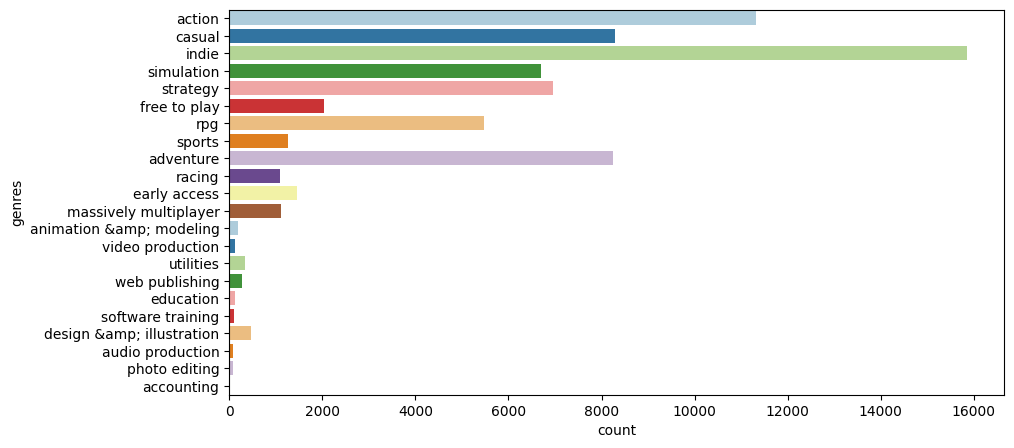

In [12]:
# Se procede a graficar la columna genres a fin de entender mejor la distribución de las categorias registradas en la columna genres
plt.figure(figsize=(10,5))
color = sns.color_palette("Paired")
sns.countplot(data=steam_games, y='genres', orient='h', palette=color)
plt.show()

Se puede observar que las categorías predominantes en la columna genre son action, casual, indie y adventure. Hay que tener en cuenta que una gran porcion de los titulos registrados comparten mas de una categoría.

In [13]:
# Se realiza un conteo de la cantidad de precios unicos en la columna price
steam_games['price'].value_counts()

price
4.99      9893
9.99      9010
0.00      8467
2.99      7834
0.99      6319
          ... 
2.89         1
99.00        1
599.00       1
8.98         1
9.00         1
Name: count, Length: 145, dtype: int64

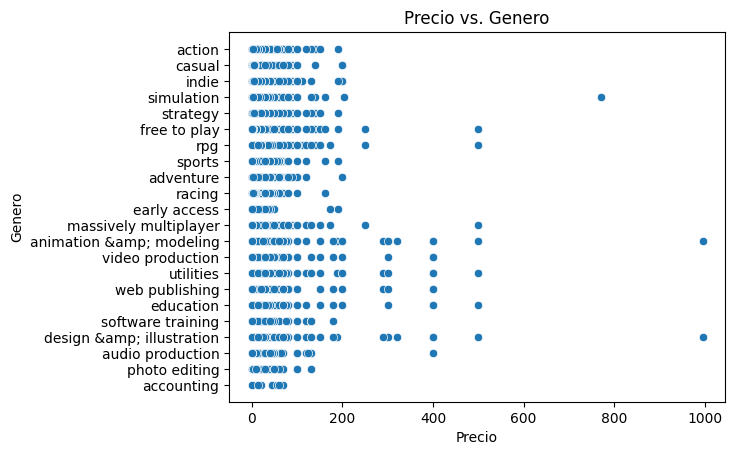

In [17]:
# Se realiza un scatterplot para entender la distribución de los datos de la relación entre las columnas genre y price
sns.scatterplot(x = 'price', y = 'genres', data=steam_games)
plt.title('Precio vs. Genero')
plt.xlabel('Precio')
plt.ylabel('Genero')

# Mostrar el gráfico
plt.show()

Se observa que en su mayoria todos los generos se concentran en un rango de precio que va desde 0 (Gratuito) a 200usd. Hay un porcentaje de registros que se encuentran entre los 200 y los 600usd, al indagar en sus categorías, éstas en su mayoria pertenecen al sector profesional, lo que es lógico ya que en un estudio de mercado se observa que los programas dedicados a profesionales suelen ser mas costosos que los videojuegos. Los registros hallados entre los 600 y los 1000usd no se consideran outliers al menos en esta instancia, ya que se han encontrado juegos y programas en ese rango de precio.